In [1]:
from knowknow import *

In [4]:
from params import *

In [5]:
db = Dataset(f"{ident}-wos-journalFilter")

loading variable anthro-wos-journalFilter/_attributes from disk
loading variable anthro-wos-journalFilter/groups from disk
loading variable anthro-wos-journalFilter/group_reps from disk


In [6]:
db.groupings = []

In [7]:
groups = db.load_variable("groups")
group_reps = db.load_variable("group_reps")

loading variable anthro-wos-journalFilter/groups from disk
loading variable anthro-wos-journalFilter/group_reps from disk


In [8]:
def isarticle(x):
    sp = x.split("|")
    if len(sp) < 2:
        return False

    try:
        int(sp[1])
        return True
    except ValueError:
        return False

In [9]:
len(db.items('c'))

loading variable anthro-wos-journalFilter/ind ___ c from disk


1383166

In [10]:
len(groups)

58727

In [11]:
c = Counter(groups.values())
c = Counter(c.values())

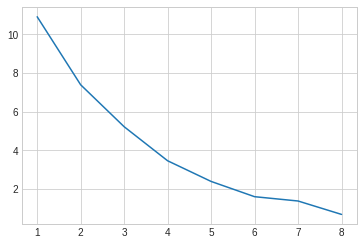

In [12]:
x = sorted(c.keys())
y = [np.log(c[xx]) for xx in x]
plt.plot(x,y)

In [13]:
udocs = list(group_reps.values())
n1 = len(groups)
n2 = sum(not isarticle(x) for x in groups)
n3 = sum(isarticle(x) for x in groups)
n4 = len(udocs)
n5 = sum(x for n,x in c.items() if n >= 5)

In [14]:
display(Markdown("""
There are {n1:,} cited works with at least 5 citations - {n2:,} books and {n3:,} articles.
After textual grouping, this reduces to {n4:,} distinct works.
There were {n5:,} cited works which had at least five separate pseudonyms.
""".format(**locals())))


There are 58,727 cited works with at least 5 citations - 22,755 books and 35,972 articles.
After textual grouping, this reduces to 56,527 distinct works.
There were 22 cited works which had at least five separate pseudonyms.


In [15]:
c = Counter(groups.values())

In [16]:
book_g = [g for x,g in groups.items() if not isarticle(x)]
article_g = [g for x,g in groups.items() if isarticle(x)]

In [17]:
book_g = [x for x in book_g if c[x]>1]
article_g = [x for x in article_g if c[x]>1]

In [18]:
# books

import json
toprint = 20
printed = 0
printi = 0

shuf = list(set(book_g))
shuffle(shuf)

while printed < toprint:
    
    myparts = ["%s (%s)" % (k,db(c=k).cits) for k,v in groups.items() if v==shuf[printi]]
    printi += 1
    
    pstr = "\n".join(myparts)
    
    if len(myparts) == 1:
        continue
        
    print(pstr)
    print()
    
    printed += 1

Braverman, H.|labor monopoly capit (56)
Braverman, H.|labour monopoly capi (7)

Gudeman, S.|ec culture (6)
Gudeman, S.|ec culture models me (22)

Levi-Strauss, C.|raw cooked (27)
Levi-Strauss, C.|raw cooked intro sci (8)

Tuzin, D.|voice tambaran (9)
Tuzin, D.|voice tambaran truth (20)

Basso, E.|favor deceit (5)
Basso, E.|favor deceit study t (7)

Mintz, S.|worker cane (10)
Mintz, S.|worker cane puerto r (11)
Mintz, S.|worker cane puerto r worker cane puerto r (16)

Wittgenstein, L.|philos investigation (68)
Wittgenstein, L.|philosophical invest (11)

Bloch, M.|blessing violence (17)
Bloch, M.|blessing violence hi (26)

Rice, P.|pottery anal (9)
Rice, P.|pottery anal source (14)
Rice, P.|pottery anal sourceb (140)

Mead, G.|mind self soc (75)
Mead, G.|mind self soc standp (22)

Marquardt, W.|archaic hunters gath (11)
Marquardt, W.|hunters gatherers (9)

Verano, J.|dis demography am (11)
Verano, J.|disease demography a (5)

Hallowell, A.|culture experience (165)
Hallowell, I.|culture e

In [19]:
# article

import json
toprint = 30
printed = 0
printi = 0

shuf = list(set(article_g))
shuffle(shuf)

while printed < toprint:
    
    myparts = ["%s (%s)" % (k,db(c=k).cits) for k,v in groups.items() if v==shuf[printi]]
    printi += 1
           
    pstr = "\n".join(myparts)
    
    
    if len(myparts) == 1:
        continue
        
    print(pstr)
    print()
    
    printed += 1

Clark, W.|1950|q j geol soc lond,v105,p225 (6)
Clark, W.|1950|q j geol soc lond,v105,p260 (10)

Tills, D.|1977|ann hum biol,v4,p23 (12)
Tills, D.|1977|ann hum biol,v4,p35 (11)

Simons, E.|1961|postilla [yale peabody mus],v54,p1 (10)
Simons, E.|1961|postilla [yale peabody mus],v57,p1 (6)

Junghans, S.|1960|studien anfangen met,v1 (6)
Junghans, S.|1968|studien anfangen met,v2 (6)

Nielsen-Marsh, C.|2000|j archaeol sci,v27,p1139 (47)
Nielsen-Marsh, C.|2000|j archaeol sci,v27,p1151 (27)

Panterbrick, C.|1996|am j hum biol,v8,p263 (8)
Panterbrick, C.|1996|am j hum biol,v8,p661 (6)
Panterbrick, C.|1996|am j hum biol,v8,p653 (9)

Garn, S.|1966|j dent res,v45,p1819 (8)
Garn, S.|1966|j dent res,v45,p1823 (5)

Colton, H.|1937|museum no arizona b,v11 (19)
Colton, H.|1939|museum no arizona b,v17 (9)

Ramsey, C.|2004|radiocarbon,v46,p155 (69)
Ramsey, C.|2004|radiocarbon,v46,p17 (23)

Sugiyama, Y.|1979|primates,v20,p323 (5)
Sugiyama, Y.|1979|primates,v20,p513 (14)

Osgood, C.|1940|yale u publication